# 3) Startups:

##### Fecha entrega: 9/11/2023.
##### El dataset de startups contiene variables como gastos en investigación y desarrollo (I+D), costos administrativos, gastos en marketing, ubicación geográfica y beneficios netos.
##### Este tipo de datos es esencial para entender el rendimiento financiero y operativo de una startup, lo cual es crítico para la toma de decisiones tanto para los inversionistas como para la administración de la empresa.

## → a. Análisis Exploratorio de Datos (EDA) 
#### ¿Qué conclusiones puede sacar con respecto a las distribuciones de las variables numéricas y las relaciones entre ellas?

## → b. Modelo de Regresión Lineal para Predecir Beneficio Neto.

## → c. ¿Cual es la intuicion detrás de la formula de la regresion resultante?

## → d. ¿Cual es el error promedio? ¿Y el error elevado al cuadrado? ¿Que significa?

## → e. Analice del Sector de la Industria en el Beneficio Neto.

## → f. ¿Cual es la relacion entre las series y el profit? ¿Es importante hay alguna particularidad? (Hint)


In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
df_startups = pd.read_csv("/Users/lolonastri/Desktop/POO_UCEMA/trabajos_practicos/tp_datos/3-startups/startups.csv")
df_startups.head()

,,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
0,0,165349.20,136897.80,471784.10,New York,192261.83,Energy,227095.722346,289,Series A,608681.90
1,1,162597.70,151377.59,443898.53,California,191792.06,Tech,224711.757208,217,Series B,595276.12
2,2,153441.51,101145.55,407934.54,Florida,191050.39,Finance,222717.429984,407,Series C,509080.09
3,3,144372.41,118671.85,383199.62,New York,182901.99,Finance,214017.365199,383,Series A,501871.47
4,4,142107.34,91391.77,366168.42,Florida,166187.94,Finance,196476.965990,351,Series B,457560.19


In [213]:
df_startups = df_startups.copy()

In [214]:
df_startups.columns

Index(['   ', 'RnD_Expenditure        ', 'Admin_Costs          ',
       'Marketing_Expenditure ', 'Location   ', 'Net_Profit          ',
       'Industry_Sector ', 'Profit              ', 'Employee_Count ',
       'Investment_Round ', 'Operational_Cost'],
      dtype='object')

In [215]:
from funciones.exploratory_data_analysis import whitespace_remover_and_columns
df_startups = whitespace_remover_and_columns(df_startups)

#### El Beneficio Neto no puede ser mayor al Profit, entonces filtramos negando esa condición.

In [216]:
df_startups =  df_startups[~(df_startups["Net_Profit"] > df_startups["Profit"])]

___

## ***a. Análisis Exploratorio de Datos (EDA)***
#### ¿Qué conclusiones puede sacar con respecto a las distribuciones de las variables numéricas y las relaciones entre ellas?

## → Validación de la data

In [217]:
print("El dataset tiene " + str(df_startups.shape[0])+ " filas.")
print("El dataset tiene " + str(df_startups.shape[1])+ " columnas.")

El dataset tiene 65 filas.
El dataset tiene 11 columnas.


In [218]:
df_startups.columns

Index(['', 'RnD_Expenditure', 'Admin_Costs', 'Marketing_Expenditure',
       'Location', 'Net_Profit', 'Industry_Sector', 'Profit', 'Employee_Count',
       'Investment_Round', 'Operational_Cost'],
      dtype='object')

In [219]:
from funciones.exploratory_data_analysis import validate_columns 
validate_columns(df_startups)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
,NaN,65.0,0,0.0,"[6, 29, 2, 17, 4]"
RnD_Expenditure,NaN,65.0,0,0.0,"[134615.46, 65605.48, 153441.51, 94657.16, 142..."
Admin_Costs,NaN,65.0,0,0.0,"[147198.87, 153032.06, 101145.55, 145077.58, 9..."
Marketing_Expenditure,NaN,65.0,0,0.0,"[127716.82, 107138.38, 407934.54, 282574.31, 3..."
Location,3,65,0,0.0,"[California, New York, Florida, New York, Flor..."
Net_Profit,NaN,65.0,0,0.0,"[156122.51, 101004.64, 191050.39, 125370.37, 1..."
Industry_Sector,5,65,0,0.0,"[Finance, Finance, Finance, Tech, Finance]"
Profit,NaN,65.0,0,0.0,"[183995.6904175256, 115595.09476990029, 222717..."
Employee_Count,NaN,65.0,0,0.0,"[315, 393, 407, 302, 351]"
Investment_Round,5,65,0,0.0,"[IPO, Seed, Series C, Series B, Series B]"


In [220]:
df_startups.describe()

,,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Net_Profit,Profit,Employee_Count,Operational_Cost
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,33.461538,79266.510049,111774.068241,221859.916112,111054.949543,124761.846602,266.846154,333633.984353
std,20.753823,43547.341447,39611.994797,126102.858824,46998.327966,53114.704730,142.020600,130589.953648
min,0.000000,0.000000,2743.241602,0.000000,-21313.506762,-14885.847169,10.000000,24435.504010
25%,16.000000,44069.950000,99281.340000,132773.329686,89949.140000,97671.232681,144.000000,244190.740000
50%,32.000000,76253.860000,120111.685301,223946.763088,108552.040000,120845.072517,289.000000,339755.060000
75%,53.000000,111737.965689,139553.160000,304768.730000,141585.520000,161119.307725,393.000000,426102.010000
max,69.000000,175623.487278,182645.560000,494430.544453,192261.830000,227095.722346,497.000000,614542.229755


___

## →  Veo los tipos de datos con dtypes

In [221]:
df_startups.dtypes

                           int64
RnD_Expenditure          float64
Admin_Costs              float64
Marketing_Expenditure    float64
Location                  object
Net_Profit               float64
Industry_Sector           object
Profit                   float64
Employee_Count             int64
Investment_Round          object
Operational_Cost         float64
dtype: object

___

## → Valores outliers

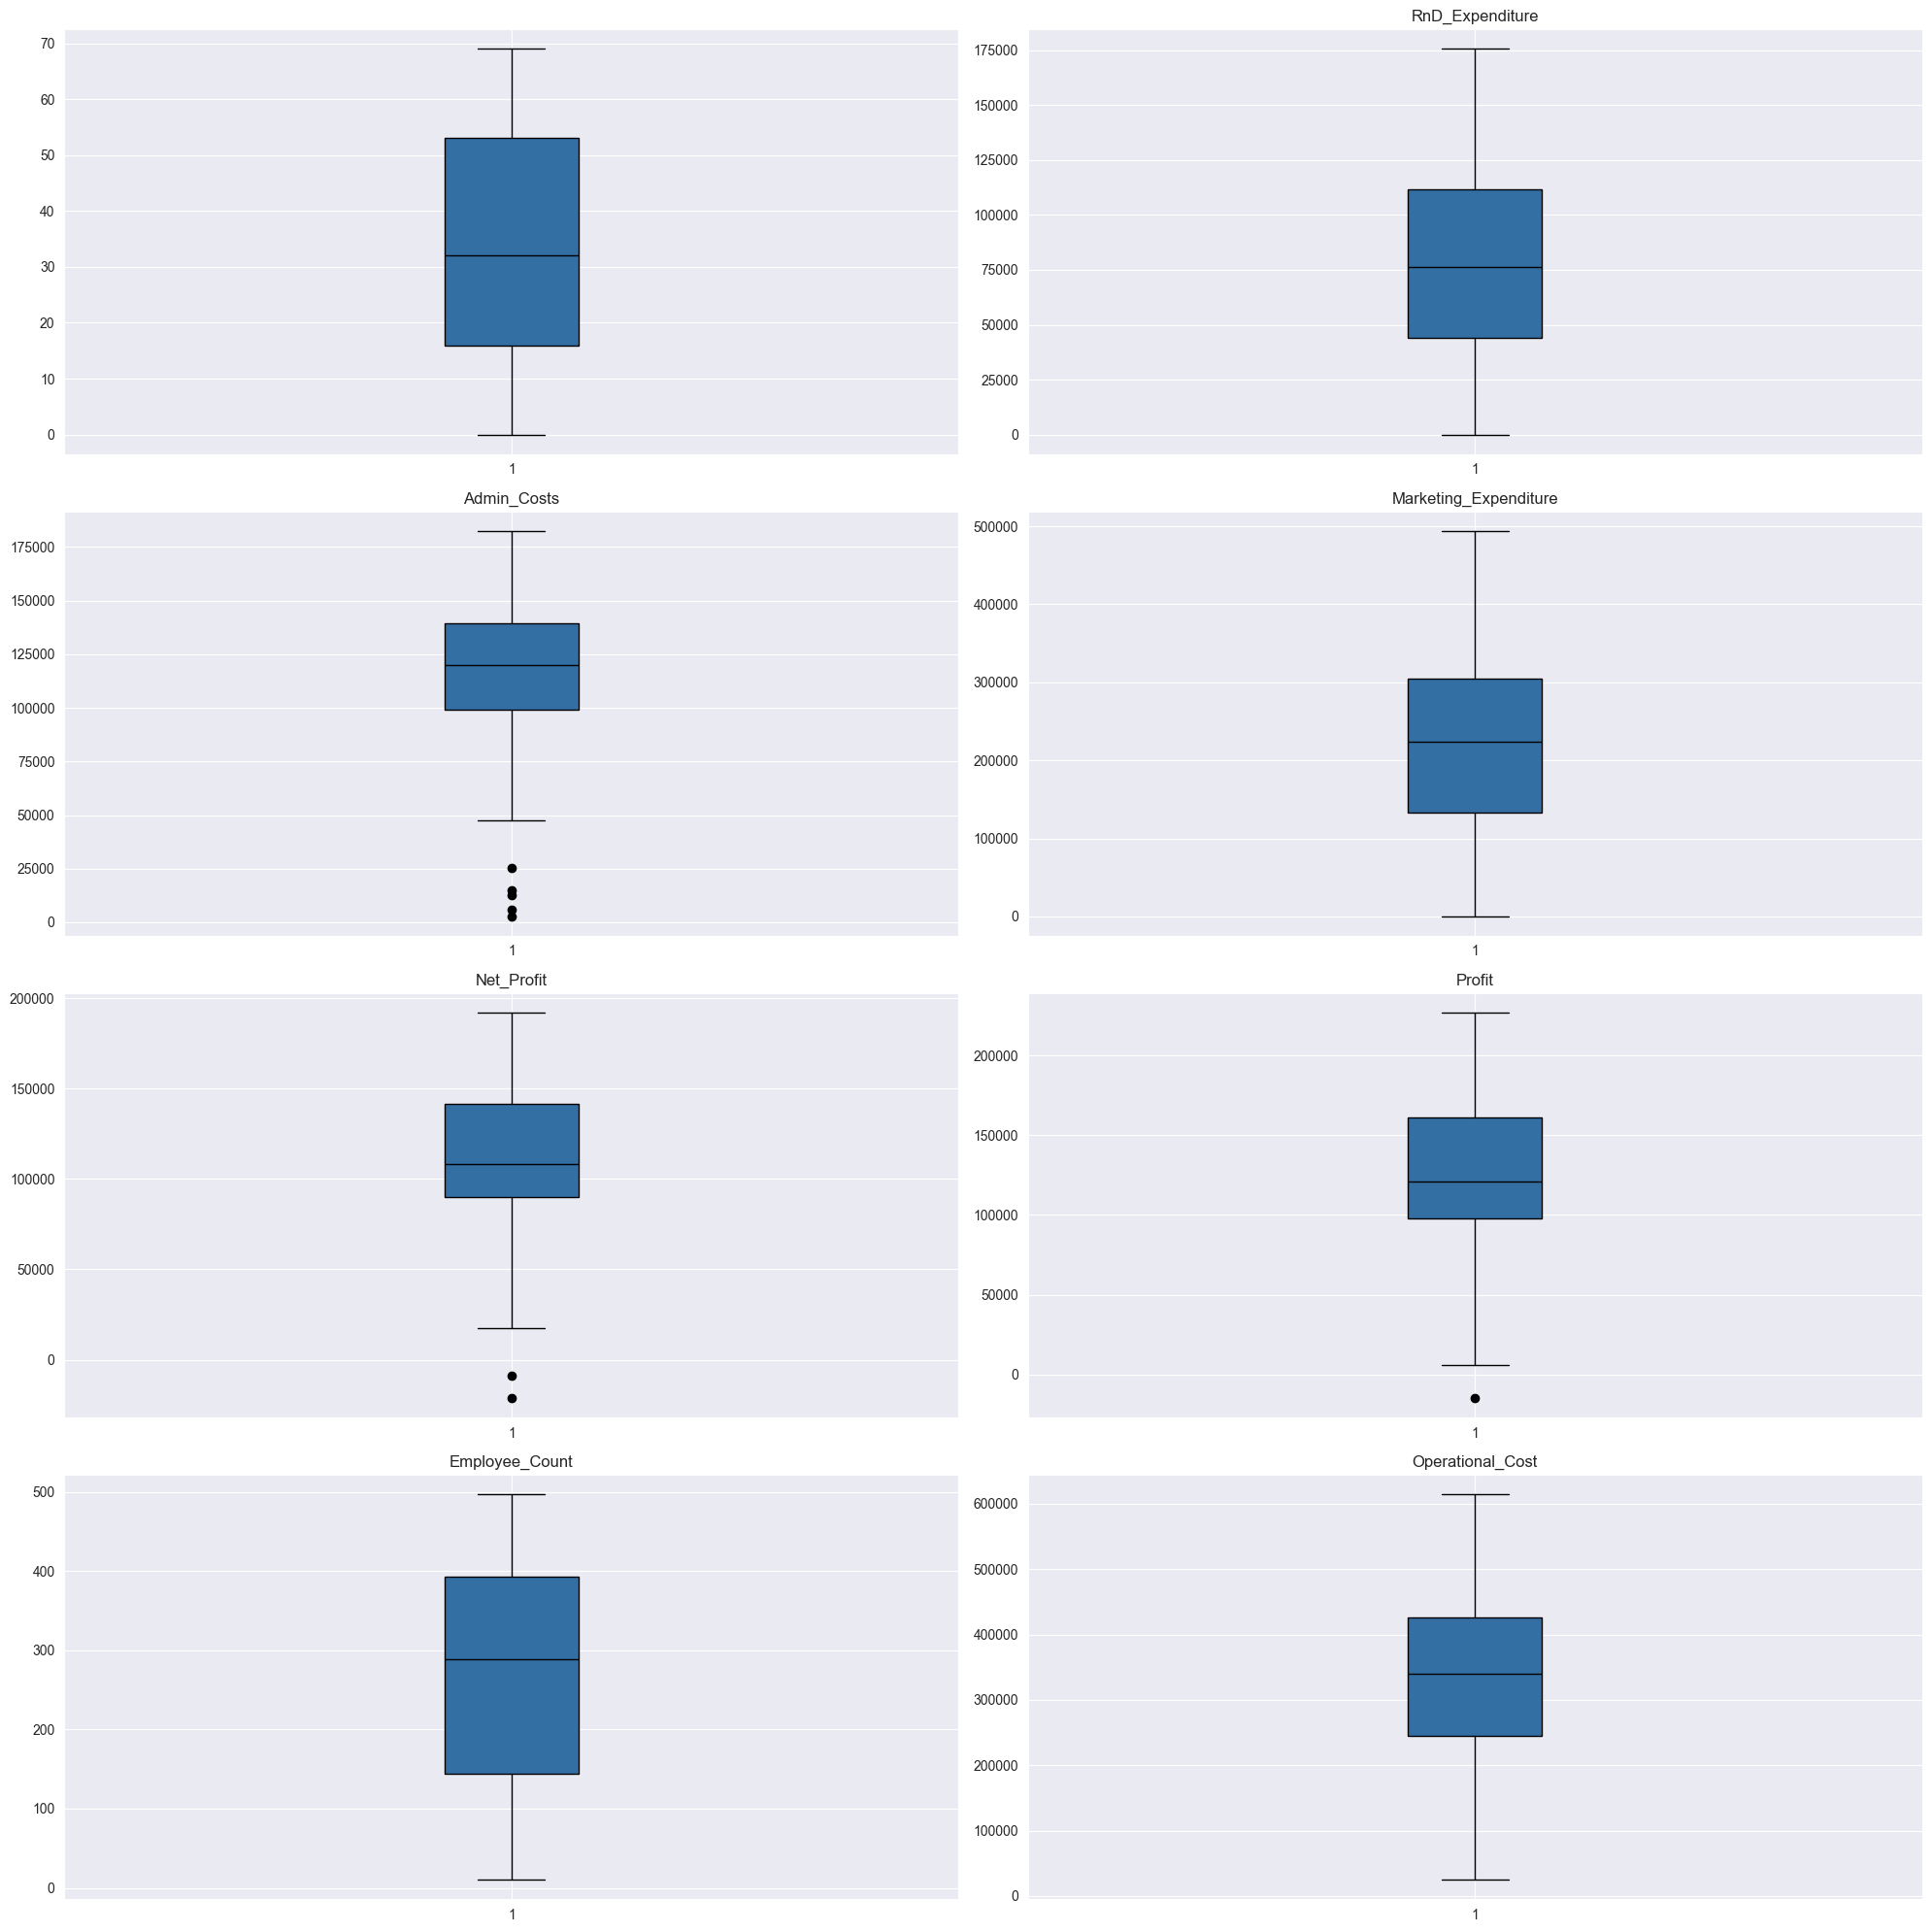

In [222]:
from funciones.exploratory_data_analysis import plot_outliers
plot_outliers(df_startups)

#### Procedemos a eliminar los "Admin_Costs" negativos ya que las startups en este caso, decidieron registrar a los valores de estos costos como positivos y no como negativos. Además, se procedió a armar una función que determina si un valor es o no outlier a partir del rango intercuartil. Los valores de "Admin_Costs" que se eliminarán son menores que 1.5 veces el valor del rango intercuartil más allá de los cuartiles.
#### Elimino también los valores de "Net_Profit" que no cumplen con la condición mencionada en la útlima oración del punto anterior.
#### Los outliers de profit son los que figuran en el output, solamente que la línea de codigo aparece comentada porque los índices 51 y 66 han sido filtrados en el análisis previo con la siguiente condición: 

```python
df_startups =  df_startups[~(df_startups["Net_Profit"] > df_startups["Profit"])]
```





In [223]:
from funciones.exploratory_data_analysis import is_outlier

outliers_admin_costs = is_outlier(df_startups["Admin_Costs"], 1.5)
outlier_values_admin_costs = df_startups["Admin_Costs"][outliers_admin_costs]

outliers_net_profit = is_outlier(df_startups["Net_Profit"], 1.5)
outlier_values_net_profit = df_startups["Net_Profit"][outliers_net_profit]

outliers_profit = is_outlier(df_startups["Profit"], 1.5)
outlier_values_profit = df_startups["Profit"][outliers_net_profit]


print("Outliers de Admin_Costs:")
print(outlier_values_admin_costs)
print("")
print("Outliers de Net_Profit:")
print(outlier_values_net_profit)
print("")
print("Outliers de Profit:")
print(outlier_values_profit)

Outliers de Admin_Costs:
56    12756.631705
57     5858.217485
58    25474.562935
60    14752.025075
68     2743.241602
Name: Admin_Costs, dtype: float64

Outliers de Net_Profit:
51    -8661.450721
66   -21313.506762
Name: Net_Profit, dtype: float64

Outliers de Profit:
51     5768.589320
66   -14885.847169
Name: Profit, dtype: float64


In [224]:
df_startups = df_startups.drop(outlier_values_admin_costs.index)
df_startups = df_startups.drop(outlier_values_net_profit.index)
#df_startups = df_startups.drop(outlier_values_profit.index) --> se saco previamente (si se prueba esta linea de codigo nos dice que los numeros 51 y 66 no están en el índice)

In [225]:
df_startups.head()

,,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
0,0,165349.20,136897.80,471784.10,New York,192261.83,Energy,227095.722346,289,Series A,608681.90
1,1,162597.70,151377.59,443898.53,California,191792.06,Tech,224711.757208,217,Series B,595276.12
2,2,153441.51,101145.55,407934.54,Florida,191050.39,Finance,222717.429984,407,Series C,509080.09
3,3,144372.41,118671.85,383199.62,New York,182901.99,Finance,214017.365199,383,Series A,501871.47
4,4,142107.34,91391.77,366168.42,Florida,166187.94,Finance,196476.965990,351,Series B,457560.19


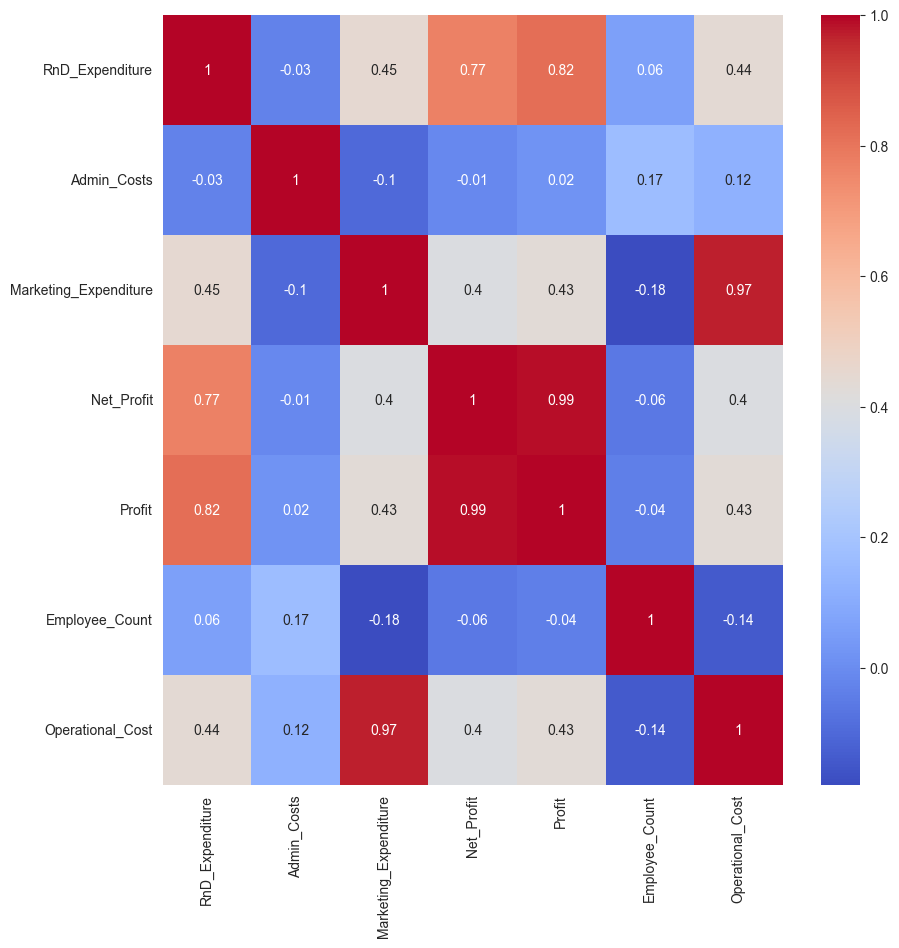

In [226]:
from funciones.machine_learning import crear_heatmap_correlacion
crear_heatmap_correlacion(df_startups)

## ***Correlaciones fuertes:***
(Las siguientes correlaciones indican que ambas variables están muy relacionadas entre sí y probablemente se pueden utilizar indistintamente en un modelo predictivo) 
##### → Las variables "Net_Profit" y "Profit" tienen una correlación muy alta de 0.99.
##### → La variable "Operational Cost" tiene una correlación alta con la variable "Marketing_Expenditure" de 0.97.
##### → Las variables "RnD_Expenditure" y "Profit" tienen una correlación alta de 0.82.
##### → Las variables "RnD_Expenditure" y "Net_Profit" tienen una correlación fuerte de 0.77.

## ***Correlaciones moderadas:***
(Las siguientes correlaciones indican que ambas variables están relacionadas entre sí pero no de manera muy fuerte) 
##### → Las variables "RnD_Expenditure" y "Marketing_Expenditure" tienen una correlación moderadamente fuerte de 0.45.
##### → Las variables "Marketing_Expenditure" y "Net_Profit" tienen una correlación moderada de 0.4.

## ***Correlaciones débiles:***
(Las siguientes correlaciones indican que ambas variables NO están muy relacionadas entre sí y probablemente NO tengan un gran impacto en un modelo predictivo) 
##### → Las variables "Admin_Costs" y "Marketing_Expenditure" tienen una correlación débil de -0.1.
##### → Las variables "Admin_Costs" y "Net_Profit" tienen una correlación débil de -0.01.
##### → La variable "Employee_Count" tiene correlaciones débiles con otras variables (todas debajo de 0.2 - salvo con "Profit"), con la más fuerte siendo 0.17 con "Admin_Costs".


##### Es importante tener en cuenta que la correlación no implica causalidad, es decir, solo porque dos variables están correlacionadas entre sí no significa que una variable cause la otra. Por lo tanto, es necesario realizar un análisis más detallado para determinar las relaciones causales entre las variables.

___

## ***b. Modelo de Regresión Lineal para Predecir Beneficio Neto.***

#### Para el modelo1 no voy a estar usando Profit porque es una variable que no se puede usar para predecir el Beneficio Neto, ya que el beneficio neto es el beneficio después de deducir todos los gastos, incluido el beneficio. Por lo tanto, no tiene sentido usarlo para predecir el beneficio neto. Por lo tanto, no voy a tener en cuenta la variable "Profit" para el modelo1.

In [227]:
# Selecciono features
features1 = ["RnD_Expenditure", "Admin_Costs", "Marketing_Expenditure", "Employee_Count", "Operational_Cost"]

In [228]:
# Sirve para estandarizar los datos
'''
from scipy.stats import zscore

columnas_para_transformar = ["RnD_Expenditure", "Admin_Costs", "Marketing_Expenditure", "Employee_Count", "Operational_Cost"]
startups_zscore = df_startups[columnas_para_transformar].apply(zscore)
df_startups[columnas_para_transformar] = startups_zscore
df_startups.head()
'''

'\nfrom scipy.stats import zscore\n\ncolumnas_para_transformar = ["RnD_Expenditure", "Admin_Costs", "Marketing_Expenditure", "Employee_Count", "Operational_Cost"]\nstartups_zscore = df_startups[columnas_para_transformar].apply(zscore)\ndf_startups[columnas_para_transformar] = startups_zscore\ndf_startups.head()\n'

In [229]:
formula1 = "Net_Profit ~ " + ' + '.join(features1)
formula1

'Net_Profit ~ RnD_Expenditure + Admin_Costs + Marketing_Expenditure + Employee_Count + Operational_Cost'

In [230]:
import statsmodels.formula.api as smf

modelo1 = smf.ols(formula=formula1, data=df_startups)
modelo1 = modelo1.fit()
print(modelo1.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:             Net_Profit   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     19.93
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           4.62e-10
Time:                        19:29:19   Log-Likelihood:                -670.16
No. Observations:                  58   AIC:                             1350.
Df Residuals:                      53   BIC:                             1361.
Df Model:                           4                                         
Covariance Type:            nonrobust  

___

## ***c. ¿Cual es la intuicion detrás de la formula de la regresion resultante?***

In [231]:
coeficientes_absolutos = abs(modelo1.params.drop('Intercept'))
coef_sorted = coeficientes_absolutos.sort_values(ascending=False)

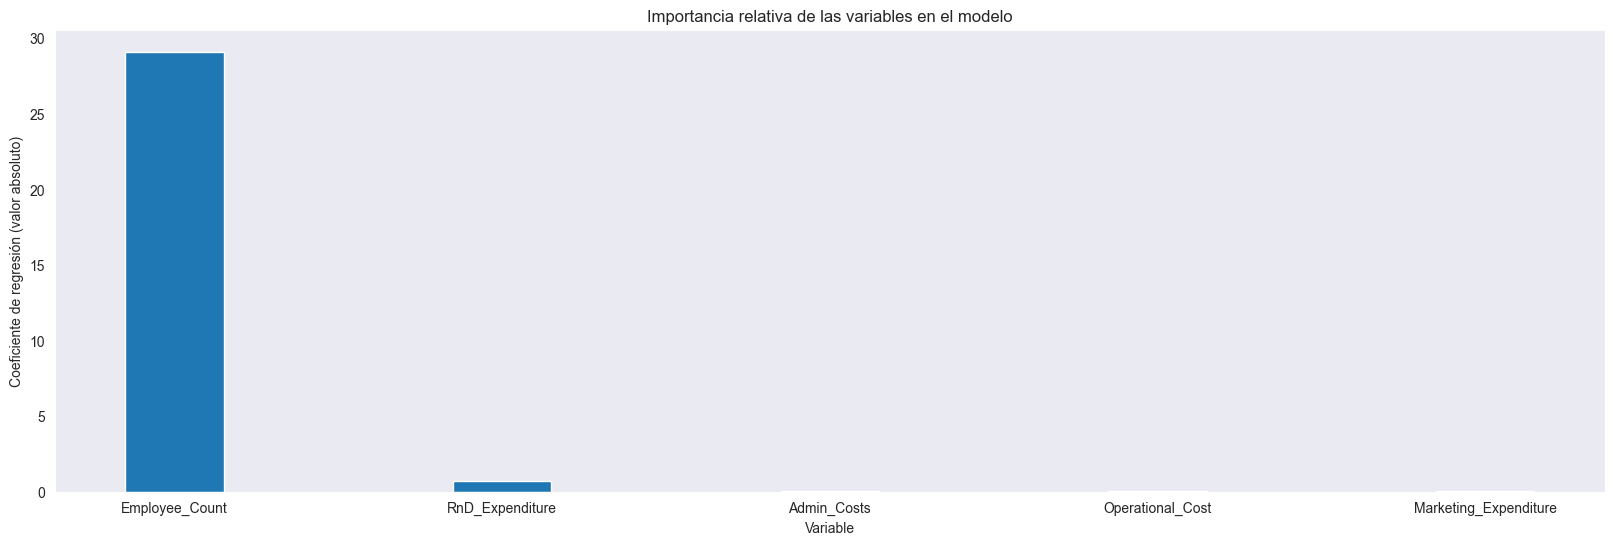

In [232]:
plt.figure(figsize=(20, 6))
plt.bar(coef_sorted.index, coef_sorted, width=0.3)
plt.xlabel('Variable')
plt.ylabel('Coeficiente de regresión (valor absoluto)')
plt.title('Importancia relativa de las variables en el modelo')
sns.set_style("darkgrid")
plt.grid(False)
plt.show()

##### La fórmula de la regresión resultante es una ecuación que describe la relación entre la variable dependiente (en este caso, "Net_Profit") y las variables independientes (en este caso, "RnD_Expenditure", "Admin_Costs", "Marketing_Expenditure", "Employee_Count" y "OperationalCost").

##### En el caso de la regresión lineal múltiple,la ecuación de regresión tiene la forma: y = b0 + b1.x1 + b2.x2 + ... + bn.xn donde "y" es la variable dependiente, "X1", "X2" ',..., "xn" son las variables independientes, "b0" es el intercepto y "b1" "b2" , ... , "bn" son los coeficientes de regresión que indican cómo cambia "y" cuando cambia cada variable independiente.

##### Hablando de este caso en particular, la intuición detrás de la fórmula es la siguiente:

##### → La variable que más impacto tiene sobre las startups definitivamente es el "Employee_Count", ya que su coeficiente es el más alto de todos hablando en términos absolutos(-29.1118), lo que significa que por cada 1 aumento de "Employee_Count", el "Net_Profit" disminuye en 29.1118. Esto tiene sentido, ya que cuanto más empleados tenga una startup, más gastos tendrá y, por lo tanto, menos beneficios netos.

##### → La segunda variable más explicativa es "R&D_Expenditure". Su coeficiente es de 0.6815, lo que significa que por cada 1 aumento de "R&D_Expenditure", el "Net_Profit" aumenta en 0.6815. Esto tiene sentido, ya que cuanto más gastos de investigación y desarrollo tenga una startup, más probable es que tenga más beneficios netos.

##### → Luego, tenemos la variable "Marketing_Expenditure", que tiene un coeficiente de -0.0057 y significa que por cada 1 aumento de "Marketing_Expenditure", el "Net_Profit" disminuye en 0.0057. Para una startup que está comenzando, es importante que tenga un buen marketing para darse a conocer, pero si gasta demasiado en marketing, puede tener menos beneficios netos.

##### → Por último, tenemos a las variables "Admin_Costs" y "OperationalCost", que tienen coeficientes de 0.0262 y 0.0204, respectivamente. Hablando de este modelo en particular son las variables menos explicativas o que menos impacto tienen debido a sus coeficientes bajos. Sin embargo, es importante tener en cuenta que en otros modelos podrían tener un impacto mayor.

### Extras:

##### ***→ R-squared*** = 0.601. Indica que solamente el 60.1% de la variación de la variable dependiente (Net_Profit) es explicada por las variables independientes(real_vs_esperado). El otro 39.9% de la variación de la variable dependiente (Net_Profit) es explicada por otras variables que no están incluidas en el modelo.


##### → Se realizó una prueba de significancia general del modelo utilizando el F-statistic. La hipótesis nula plantea que todos los coeficientes (betas) son iguales a cero, mientras que la hipótesis alternativa sugiere que al menos uno de los coeficientes es distinto de cero. En otras palabras, si todos los coeficientes son cero, significa que ninguna de las variables independientes tiene un impacto significativo en la variable dependiente, lo que implicaría que el modelo carece de mérito. Sin embargo, el F-statistic obtenido fue de 19.93, con un p-valor aproximadamente igual a 0.000. Esto indica que el modelo es estadísticamente significativo, lo que a su vez sugiere que al menos una de las características (features) está relacionada de manera significativa con la variable dependiente.


___

## ***d. ¿Cual es el error promedio? ¿Y el error elevado al cuadrado? ¿Qué significa?***

In [233]:
df_startups["predicho"] = modelo1.predict(df_startups[features1])
df_startups["error"] = df_startups["Net_Profit"] - df_startups["predicho"]
print("El error promedio es de: " + str(df_startups["error"].mean()))

El error promedio es de: 1.3046544687501316e-11


#### El "error promedio" es la media de los errores de predicción del modelo de regresión lineal múltiple. En este caso, el error promedio se calcula como la diferencia entre los valores observados de Beneficio Neto y los valores predichos por el modelo (luego a eso, se le hace el promedio).
#### Un error promedio bajo indica que el modelo se ajusta bien a los datos y que las predicciones son precisas. Por otro lado, un error promedio alto indica que modelo no se ajusta bien a los datos y que las predicciones no son precisas.
#### En cuanto al valor específico que menciona (1.3046544687501316e-11), esto significa que el error promedio es extremadamente bajo, en el orden de 10^-11. Esto indica que el modelo se ajusta muy bien a los datos y que las predicciones son muy precisas. Sin embargo, es importante tener en cuenta: que este valor puede ser influenciado por el tamaño de la muestra y la precisión de los datos utilizados para ajustar el modelo.
#### Podemos concluir también, que el error medio esta mal porque se cancela lo positivo con lo negativo.

In [234]:
# Primera manera de calcular el MSE

from sklearn.metrics import mean_squared_error

y_pred = modelo1.predict()
y_actual = df_startups['Net_Profit']

mse = mean_squared_error(y_actual, y_pred)
print("Error Cuadrático Medio (MSE): {:.2f}".format(mse))

Error Cuadrático Medio (MSE): 636237732.58


/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [235]:
# Segunda manera de calcular el MSE

print("El Error Cuadrático Medio (MSE) es de: " + str(((df_startups["Net_Profit"] - df_startups["predicho"])**2).mean()))

El Error Cuadrático Medio (MSE) es de: 636237732.5753268


#### El error cuadrático medio es una medida de la precisión del modelo (es una medida de la calidad del ajuste de los datos). Cuanto menor sea el error cuadrático medio, mejor será el modelo. Sin embargo, es importante tener en cuenta que el error cuadrático medio no puede compararse con el error cuadrático medio de otros modelos, ya que depende de la escala de la variable dependiente. Un MSE bajo y un R² alto indican que el modelo se ajusta bien a los datos.
#### En este caso, un MSE de 636237732.58 significa que, en promedio, los valores predichos por el modelo difieren de los valores observados en aproximadamente 636 millones de dólares.
#### El mejor error de todas maneras, es el Mean Absolute Percentage Error, tambiénn conocido como MAPE, que es el error porcentual.

___

## ***e. Analice del Sector de la Industria en el Beneficio Neto.***

In [236]:
df_industry_profit = df_startups.groupby('Industry_Sector').agg(Net_Profit_por_sector=('Net_Profit', 'mean'), Cantidad_de_startups=('Location', 'count')).sort_values('Net_Profit_por_sector', ascending=False)
df_industry_profit.reset_index(inplace=True)
df_industry_profit

,Industry_Sector,Net_Profit_por_sector,Cantidad_de_startups
0,Finance,129717.322667,13
1,Energy,119164.632042,8
2,Tech,116933.777287,15
3,Retail,111936.726620,9
4,Healthcare,104079.002960,13


#### Si yo le tendría que recomendar a las startups en qué "Industry_Sector" deben meterse para tener más beneficios netos, les recomendaría que se metan en el sector "Finance" ya que es el que tiene el mayor beneficio neto promedio (1.2 billones de dólares). Sin embargo, es importante tener en cuenta que el sector "Finance" tiene un solo valor, por lo que no es representativo de todo el sector. Por lo tanto, si tuviera que recomendar un sector en el que las startups deberían meterse para tener más beneficios netos, sería el sector "Healthcare" ya que tiene el segundo mayor beneficio neto promedio (1.1 billones de dólares) y tiene 3 valores, por lo que es más representativo del sector.

___

## ***f. ¿Cual es la relacion entre las series y el profit? ¿Es importante hay alguna particularidad? (Hint)***

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_27070/1512368245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Investment_Round', y='Profit', data=df_startups, order=order, palette=palette, ax=axs[0, 0])
/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_27070/1512368245.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Investment_Round', y='Marketing_Expenditure', data=df_startups, order=order, palette=palette, ax=axs[0, 1])
/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_27070/1512368245.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend

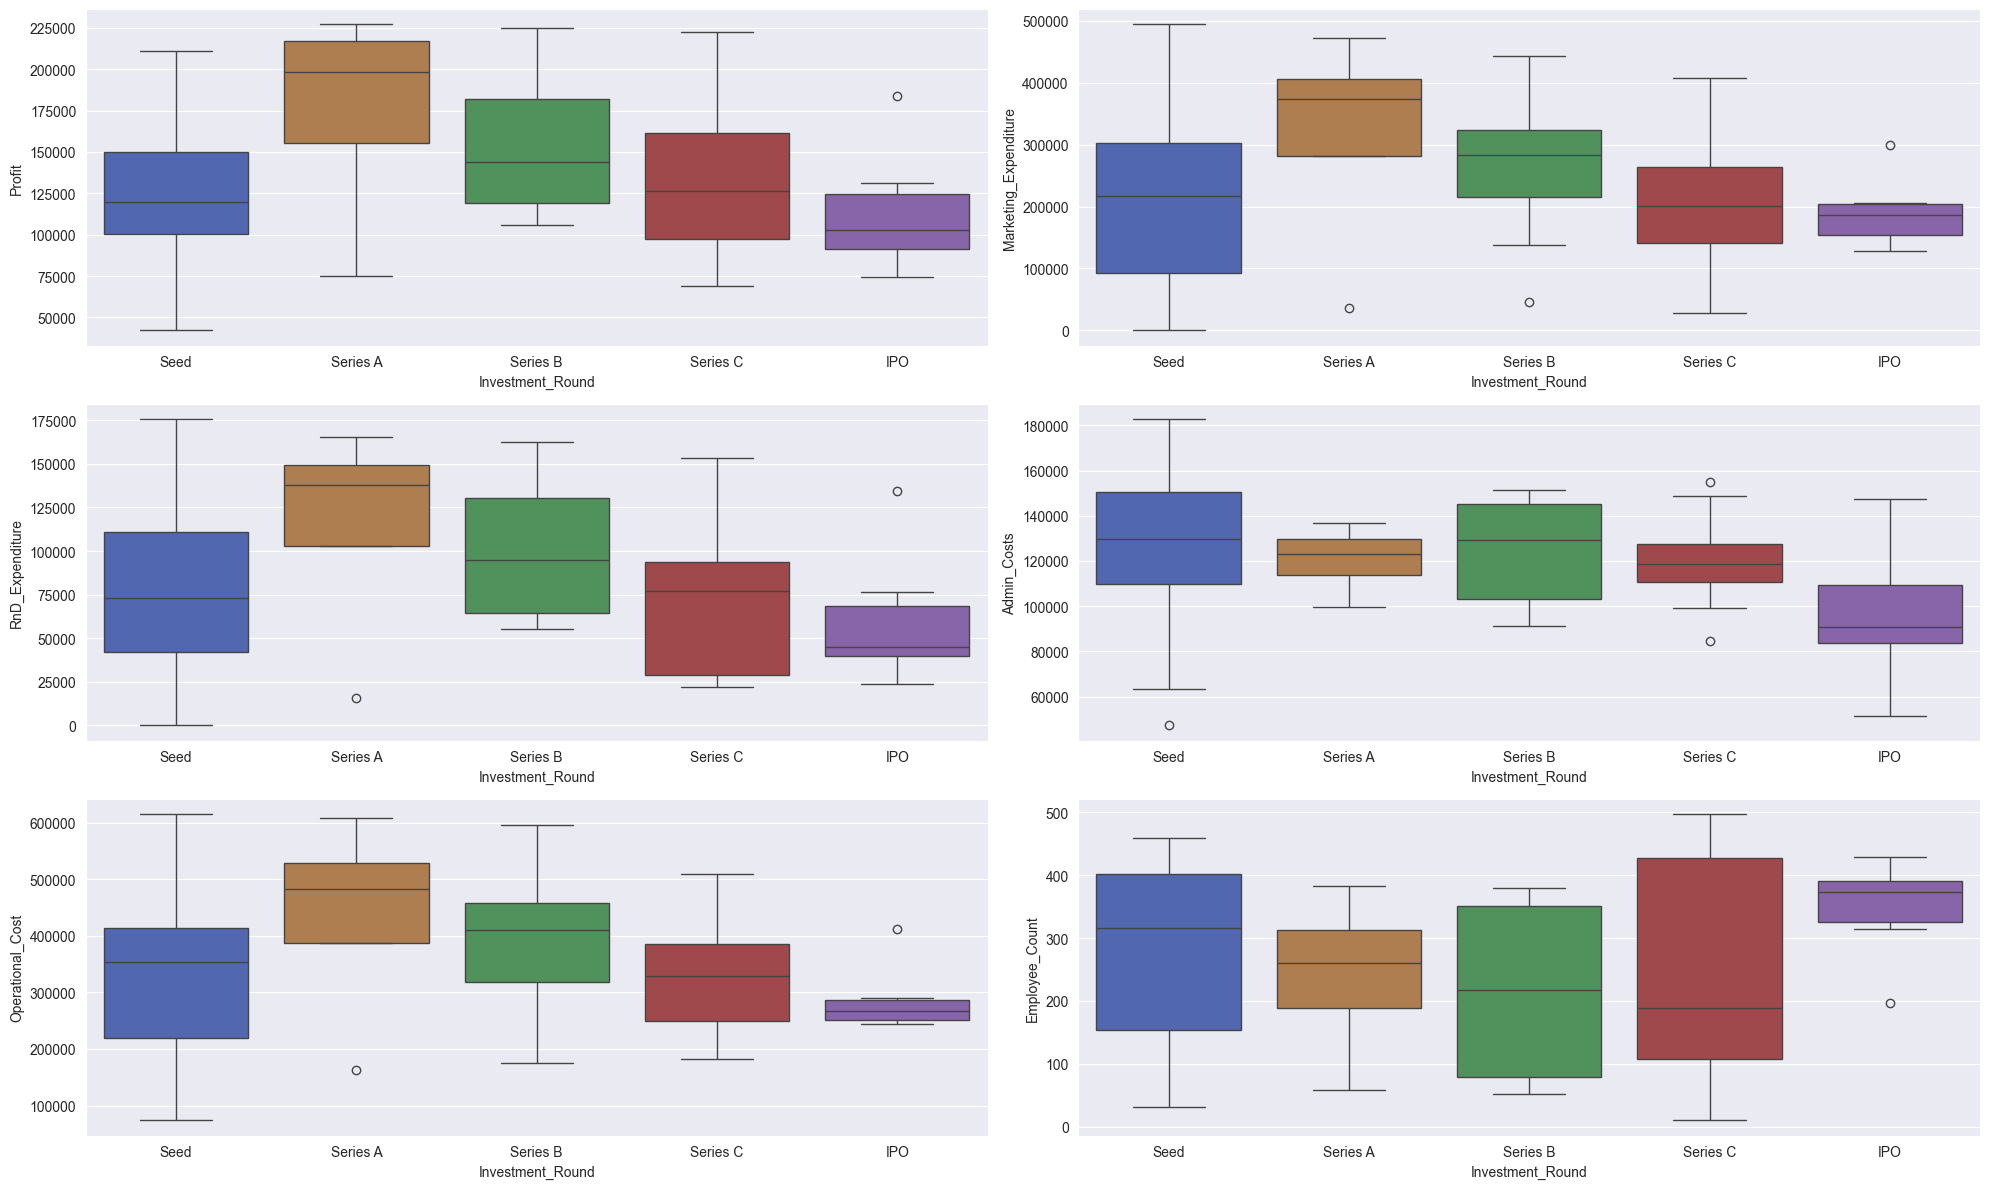

In [237]:
palette = sns.color_palette('bright', n_colors=len(df_startups['Investment_Round'].unique()), desat=0.5)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
order = ['Seed', 'Series A', 'Series B', 'Series C', 'IPO']
sns.boxplot(x='Investment_Round', y='Profit', data=df_startups, order=order, palette=palette, ax=axs[0, 0]) 
sns.boxplot(x='Investment_Round', y='Marketing_Expenditure', data=df_startups, order=order, palette=palette, ax=axs[0, 1]) 
sns.boxplot(x='Investment_Round', y='RnD_Expenditure', data=df_startups, order=order, palette=palette, ax=axs[1, 0]) 
sns.boxplot(x='Investment_Round', y='Admin_Costs', data=df_startups, order=order, palette=palette, ax=axs[1, 1])
sns.boxplot(x='Investment_Round', y='Employee_Count', data=df_startups, order=order, palette=palette, ax=axs[2, 1])
sns.boxplot(x='Investment_Round', y='Operational_Cost', data=df_startups, order=order, palette=palette, ax=axs[2, 0])
plt.tight_layout() 

#### El boxplot entre "Profit" e "Investment_Round" demuestra que, en general, los valores de profit son más altos en las rondas de inversión "Series A" y "Series B", pero esto no se cumple en todos los casos. Además, hay una gran variabilidad en los valores de profit para cada ronda de inversión, lo que sugiere que hay otros factores que influyen en el profit de una startup.
#### En cuanto a las otras variables, el boxplot de "Marketing_Expenditure" sugiere que las startups tienden a gastar más en marketing en las rondas de inversión "Series A" y "Series B". El boxplot de "RnD_Expenditure" sugiere que las startups tienden a gastar más en investigación y desarrollo en las rondas de inversión "Series A" y "Series B". El boxplot de "Admin_Costs" sugiere que los costos administrativos son más altos en la ronda de inversión "IPO". El boxplot de employee count sugiere que las startups tienden a tener más empleados en las rondas de inversión "Series A" y "Series B". El boxplot de operational cost sugiere que los costos operativos son más altos en la ronda de inversión "IPO".
#### En general, estos resultados sugieren que hay diferencias en la forma en que las startups utilizan los fondos de inversión en cada ronda, pero las "Series A" y "Series B" son las que más se destacan. A mayor "Profit", mayores gastos.

___

### Extra: al modelo 1, le agrego las variables categóricas de "Industry_Sector" para ver si mejora el modelo. Para realizar esto, hago One Hot Encoding. La mayoría de los modelos de ML no puede utilizar texto, así que hay que convertir el texto a números de alguna manera. Lo que hace One-Hot Encoding es convertir una columna con X categorías a X columnas.


In [238]:
from sklearn.preprocessing import OneHotEncoder

IndustrySector_ohe = OneHotEncoder(sparse=False) # Instancio One hot encoder
IndustrySector_ohe.fit(df_startups[['Industry_Sector']]) # Fitteo one hot encoder
IndustrySector_ohe.categories_ # Veo las categorias de IndustrySector_ohe

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


[array(['Energy', 'Finance', 'Healthcare', 'Retail', 'Tech'], dtype=object)]

In [239]:
df_startups['Energy'],df_startups['Finance'],df_startups['Healthcare'],df_startups['Retail'], df_startups['Tech'] = IndustrySector_ohe.fit_transform(df_startups[['Industry_Sector']]).T # pongo las columnas encodeadas de vuelta en el dataframe.
df_startups.drop(columns=['Industry_Sector'], inplace = True) # Droppeo la columna original
df_startups.head()

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_s

,,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Profit,Employee_Count,Investment_Round,Operational_Cost,predicho,error,Energy,Finance,Healthcare,Retail,Tech
0,0,165349.20,136897.80,471784.10,New York,192261.83,227095.722346,289,Series A,608681.90,178688.089646,13573.740354,1.0,0.0,0.0,0.0,0.0
1,1,162597.70,151377.59,443898.53,California,191792.06,224711.757208,217,Series B,595276.12,179173.873144,12618.186856,0.0,0.0,0.0,0.0,1.0
2,2,153441.51,101145.55,407934.54,Florida,191050.39,222717.429984,407,Series C,509080.09,164534.568007,26515.821993,0.0,1.0,0.0,0.0,0.0
3,3,144372.41,118671.85,383199.62,New York,182901.99,214017.365199,383,Series A,501871.47,159505.981166,23396.008834,0.0,1.0,0.0,0.0,0.0
4,4,142107.34,91391.77,366168.42,Florida,166187.94,196476.965990,351,Series B,457560.19,157372.932725,8815.007275,0.0,1.0,0.0,0.0,0.0


In [240]:
# Selecciono features
features2 = ["RnD_Expenditure", "Admin_Costs", "Marketing_Expenditure", "Employee_Count", "Operational_Cost", "Energy", "Finance", "Healthcare", "Retail", "Tech"]

In [241]:
formula2 = "Net_Profit ~ " + ' + '.join(features2)
formula2

'Net_Profit ~ RnD_Expenditure + Admin_Costs + Marketing_Expenditure + Employee_Count + Operational_Cost + Energy + Finance + Healthcare + Retail + Tech'

In [242]:
import statsmodels.formula.api as smf

modelo2 = smf.ols(formula=formula2, data=df_startups)
modelo2 = modelo2.fit()
print(modelo2.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:             Net_Profit   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     10.43
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           2.18e-08
Time:                        19:29:20   Log-Likelihood:                -667.94
No. Observations:                  58   AIC:                             1354.
Df Residuals:                      49   BIC:                             1372.
Df Model:                           8                                         
Covariance Type:            nonrobust  

#### El R² de este modelo (modelo2) es de 63%, lo cual es casi un 3% más alto que el del modelo anterior (60,1%). Esto significa que este modelo se ajusta un poquito mejor a los datos que el modelo1 (modelo anterior).